<a href="http://esprit.tn"><img src = "https://upload.wikimedia.org/wikipedia/commons/f/ff/Logo_ESPRIT_Ariana.jpg" width = 300, align = "center"></a>



<h1 align=center><font size = 5>Examen </h1>
<h2 align=center> Niveau: 4 BI - Info. </h2>
<h2 align=center> Matière : Data mining  </h2> 
<h3 align=center> A.U. : 2018-2019 </h3> 
Durée de l'epreuve : 80 min

<br></br>

<img src="img/exam.jpg"  width = 50>
l'examen se compose de **trois parties indépendantes**. Vous pouvez commencer par la partie qui vous semble la plus convenable et abordable. Toutefois,  Une bonne lecture de l'intégralité du sujet au début de l'épreuve est fortement recommandée. Elle vous permettera de bien répartir votre effort sur les trois parties.
Il est préferable de consacrer entre 25 et 30 min pour chaque partie.
A la fin de l'épreuve, le répertoire contenant le notebook et portant votre nom et votre prénom doit &ecirc;tre remis à l'enseignant qui assure la surveillance. 

<H3> Aucun échange de documents (numérique ou papier) ou d'objets n'est autorisé durant l'examen.</H3>
<H2> Pareillement, Aucune connection internet n'est autorisée </H2>


 

### NOM & Prénom: 

Jemmali Walid

### CIN:

# Partie I: Questions de reflexion (5 pts)

- Quel est l algorithme d'apprentissage qui repose sur la génération des hyperplan.

ANN

- Expliciter le role des bibliothèques suivantes MLextend et pandas.

MLxtend c'est pour l'évaluation des modéles


pandas c'est pour la manipulation des dataframe

- Quelle est la différence entre KDD et CRISP-DM?

kdd (Knowledge Discovery in Database)  c'est la methode classique  


crisp-dm (cross industry standard process for data mining ) moins l'extension de kdd

# Partie II: (4 pts)

Une équipe sportive desire etudier les causes de blessures des licenciés entre 18 et 25 ans. 
Elle aimerai bien profiter de l'historiques des performances ainsi que celui des blessures des 3 années précédentes.

Proposer une démarche d'analyse 

Serait-il possible de proposer un algorithme prédictif? Justifier votre réponse (min 5 lignes)

# Partie III: 5pts

En utilisant, le logo (image) du repertoire img :

    - Génèrer la représentation numérique (RGB) de l'image
    - Affichez les dimensions des matrices.
    - Proposer une transformation qui génère l'image en noir et blanc.

In [20]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

In [48]:
img = io.imread('img\Logo_ESPRIT_Ariana.jpg')

In [49]:
print(img.shape)

(315, 851, 3)


In [50]:
from skimage.color import rgb2gray

In [51]:
imgg = rgb2gray(img)


In [52]:
print('Image shape:', imgg.shape, '\n')

Image shape: (315, 851) 



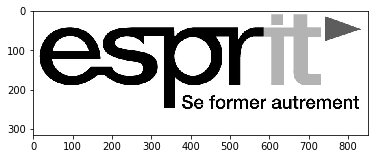

In [54]:
plt.imshow(imgg, cmap="gray")

Quel est l'avantage de cette representation?

2 dimension

Serait-il possible de concevoir une application qui detecte et reconnais les logos des entreprises? Comment?

In [ ]:
oui c'est possible
par le Binning image intensity distribution
ça consiste à mettre les logos en gris 
et puis par Edge detection pour detecter les logos aprés avoir mettre les dimension en binnaire

# Partie IV:

### Déscription du benchmark
On se propose de mener une étude prédictive qui analyse l'état de santé des patients et génère le traitement recommandé par le medecin pour ce profil de patients. En se servant de la base de données utilisé en TP, **drug200.csv**, on vous demande de mettre en place un modèle prédictif capable d'identifier pour un patient donnée le traitement adéquat.
Chaque ligne du fichier correspond aux données d'un seul patient. Un patient est representé par cinq attributs ainsi que le traitement (drug) proposé. Le but de cette étude est développer un modèle prédictif qui est capable de prédire la colonne cible drug à partir des cinq premiers attributs.

A fin de bien implémenter le modèle on vous propose de suivre la démarche proposée par ce LAB.


### Importer les modules python necessaires à l'implementation des deux modèles prédictifs suivants:
- ANN avec deux couches cachées ayant respectivement 5 et 6 neurones
- un arbre de décision


In [7]:
import numpy as np
import pandas as pnd
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, roc_curve, classification_report,auc)


## Implémenter les deux modèles en tenant compte des étapes de pre-traitement et preparation de données

In [2]:
path =  'drug200.csv'
dataset= pnd.read_csv(path)


In [4]:
dataset.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [5]:
dataset.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [9]:
def show_dist(df_column, tag = 'Column'):
    if not df_column.empty: 
        dist = df_column.value_counts()
        print("%s distribution:\n" %tag, dist)

#Test
show_dist(dataset.BP, tag="train dataset before ")  

train dataset before  distribution:
 HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


In [10]:
def get_categorical2(dataframe):
    types = dataframe.dtypes
    i = 0
    lst_cat=[]
    for var in types:
        if var == 'object':
            print(i)
            lst_cat.append(i)
        i=i+1
    return lst_cat

In [11]:
lst= get_categorical2(dataset)
for i in lst:
    print(i, dataset.columns[i])

1
2
3
5
1 Sex
2 BP
3 Cholesterol
5 Drug


In [12]:
import sklearn.preprocessing as etl
for cat_idx in lst:
    cat_attrib= dataset.columns[cat_idx]
    print ('handling cat attribute.. ',cat_attrib)
    
    enc = etl.label.LabelEncoder()
    show_dist(dataset[cat_attrib], ' (before)')
    dataset[cat_attrib] = enc.fit_transform(dataset[cat_attrib])
    show_dist(dataset[cat_attrib], ' (after)')


handling cat attribute..  Sex
 (before) distribution:
 M    104
F     96
Name: Sex, dtype: int64
 (after) distribution:
 1    104
0     96
Name: Sex, dtype: int64
handling cat attribute..  BP
 (before) distribution:
 HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
 (after) distribution:
 0    77
1    64
2    59
Name: BP, dtype: int64
handling cat attribute..  Cholesterol
 (before) distribution:
 HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
 (after) distribution:
 0    103
1     97
Name: Cholesterol, dtype: int64
handling cat attribute..  Drug
 (before) distribution:
 drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64
 (after) distribution:
 4    91
3    54
0    23
2    16
1    16
Name: Drug, dtype: int64


In [13]:
dataset.dtypes

Age              int64
Sex              int32
BP               int32
Cholesterol      int32
Na_to_K        float64
Drug             int32
dtype: object

In [14]:
X=  dataset.iloc[:,:5]
y=  dataset.iloc[:, 5]
etl_norm = etl.Normalizer()
scaler= etl_norm.fit(X)

In [15]:
X=scaler.transform(X)

In [16]:
X[:5]

array([[0.67187271, 0.        , 0.        , 0.        , 0.74066663],
       [0.9629153 , 0.02048756, 0.02048756, 0.        , 0.26824362],
       [0.97719793, 0.02079145, 0.02079145, 0.        , 0.21028468],
       [0.96106574, 0.        , 0.06864755, 0.        , 0.26765681],
       [0.9588126 , 0.        , 0.01571824, 0.        , 0.28360419]])

## Comparer les performances des deux modèles